# Dogecoin Price Analysis


![](https://image.cnbcfm.com/api/v1/image/106836865-1612779436680-gettyimages-1299388491-yn_dogecoinillustration_011.jpeg?v=1612779511&w=678&h=381)

By Eric Wilson

Cryptocurrency - is it the precious metals of this millenium, or just another passing fad, to be traded, hoarded, and then sold off at yard sales for $1 a piece, like the beanie babies once Y2K passed? 

Maybe I'm late to the game, but I've heard an increasing number of people talking about Dogecoin. Let's take a look at this data, graciously available on Kaggle (thank you to Dhruvil Dave), and see how Dogecoin has evolved.

### Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
doge = pd.read_csv('../input/dogecoin-historical-data/DOGE-USD.csv')
doge.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,0.000293,0.000299,0.000260,0.000268,0.000268,1463600.0
1,2014-09-18,0.000268,0.000325,0.000267,0.000298,0.000298,2215910.0
2,2014-09-19,0.000298,0.000307,0.000275,0.000277,0.000277,883563.0
3,2014-09-20,0.000276,0.000310,0.000267,0.000292,0.000292,993004.0
4,2014-09-21,0.000293,0.000299,0.000284,0.000288,0.000288,539140.0


Close and Adj Close seem to be the same, so I'm going to drop Adj Close to minimize columns. Let's also change our index to the date.

In [3]:
doge = doge.set_index('Date')
doge = doge.drop(columns = ['Adj Close'])

### Data Cleaning

Let's check if there is any missing data.

In [4]:
doge.isna().sum()

Open      4
High      4
Low       4
Close     4
Volume    4
dtype: int64

Each column has an equal amount of missing values - let's explore that further. With luck, they will all belong to the same dates (a day is missing all data, rather than several just missing a piece or two).

In [5]:
nodoge = doge[pd.isnull(doge).any(axis=1)]
nodoge

,Open,High,Low,Close,Volume
Date,,,,,
2020-04-17,NaN,NaN,NaN,NaN,NaN
2020-10-09,NaN,NaN,NaN,NaN,NaN
2020-10-12,NaN,NaN,NaN,NaN,NaN
2020-10-13,NaN,NaN,NaN,NaN,NaN


Luckily, there are few dates that are missing all info. We'll save this as a seperate dataframe, just incase we need to reference it later. 

It is interesting that, out of the roughly 7 years of data, all missing data happened during the Covid Pandemic.

## Data Analysis

### Adding Values

Let's add four values: Day Change, Day Range, Average Price, and Impact.

*     Day Change will be Close minus Open, in order to show the overall change in value over the course of each day. Naturally, the higher the worth of Dogecoin, the higher the change should be expected.

*     Day Range will be High minus Low, to show the volatility of Dogecoin on each day. Similar to Day Change, the higher the worth of Dogecoin, the higher volatility should be expected in terms of Day Range.

*     Average Price will be a little tricky: we'll take the average of the Open, Close, High, and Low values. The term "average" is used loosely, due to how volatile value can be during each day.

*     Impact will also be tricky; we'll multiply Average Price by the volume for the day. In theory, this will give us a standard (again using the terms "standard" and "average" loosely) value to the amount of money taking place in Dogecoin transactions in a day. 

In [6]:
doge2 = doge
doge2['DC'] = doge2.Close - doge2.Open
doge2['DR'] = doge2.High - doge2.Low
doge2['Average'] = ((doge2.Open + doge2.Close + doge2.High + doge2.Low) / 4)
doge2['Impact'] =  doge2.Average * doge2.Volume
doge2.head()

,Open,High,Low,Close,Volume,DC,DR,Average,Impact
Date,,,,,,,,,
2014-09-17,0.000293,0.000299,0.000260,0.000268,1463600.0,-0.000025,0.000039,0.000280,409.808000
2014-09-18,0.000268,0.000325,0.000267,0.000298,2215910.0,0.000030,0.000058,0.000289,641.505945
2014-09-19,0.000298,0.000307,0.000275,0.000277,883563.0,-0.000021,0.000032,0.000289,255.570598
2014-09-20,0.000276,0.000310,0.000267,0.000292,993004.0,0.000016,0.000043,0.000286,284.247395
2014-09-21,0.000293,0.000299,0.000284,0.000288,539140.0,-0.000005,0.000015,0.000291,156.889740


### Data Range

Let's look at the distribution of data: the maximum, minimum, average, and overall spread of values in the data.

In [7]:
doge2.describe()

,Open,High,Low,Close,Volume,DC,DR,Average,Impact
count,2393.000000,2393.000000,2393.000000,2393.000000,2.393000e+03,2.393000e+03,2393.000000,2393.000000,2.393000e+03
mean,0.003517,0.003730,0.003326,0.003530,1.370523e+08,1.315963e-05,0.000405,0.003526,5.626829e+06
std,0.009354,0.010059,0.008749,0.009397,8.851032e+08,9.981884e-04,0.001884,0.009370,4.976991e+07
min,0.000087,0.000089,0.000085,0.000087,1.669500e+04,-1.862700e-02,0.000002,0.000087,1.995053e+00
25%,0.000224,0.000228,0.000220,0.000224,2.257060e+05,-2.000000e-05,0.000011,0.000225,4.648745e+01
50%,0.002041,0.002078,0.001991,0.002043,8.143520e+06,-1.000000e-06,0.000072,0.002040,2.110234e+04
75%,0.002906,0.002999,0.002802,0.002904,4.811798e+07,1.700000e-05,0.000193,0.002912,1.510336e+05
max,0.078773,0.084945,0.068525,0.078825,2.540331e+10,2.128000e-02,0.045632,0.076706,1.277850e+09


The highest value ever recorded for Dogecoin was 8.5 cents, and the lowest was roughly .3 cents (only  slightly lower than the price at its first open). The most volatile day saw a value fluctuation of roughly 4.6 cents, which is well over half of the record high. 

How does the distribution of values compare next to one another? (We'll have to remove volume and impact, which exist on a different scale)

Text(0.5, 1.0, 'Dogecoin Value Distribution')

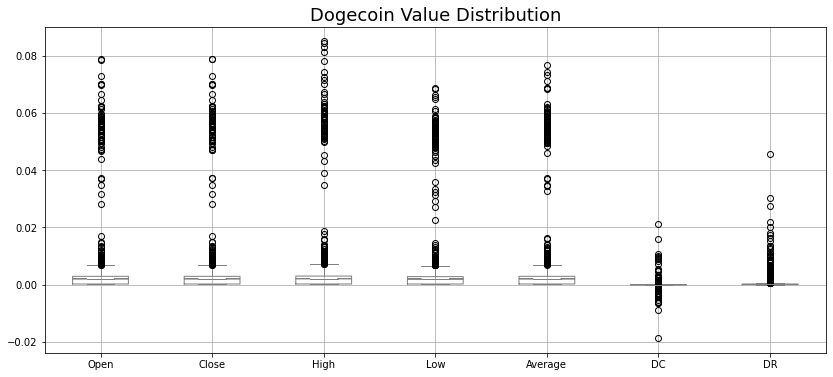

In [8]:
d2p = doge2[['Open', 'Close', 'High', 'Low', 'Average', 'DC', 'DR']]
d2pp = d2p.boxplot(color = 'gray', figsize = [14, 6], notch = True)
d2pp.set_title('Dogecoin Value Distribution', fontsize=18)

Statistically, the dots are outliers, accounting for less than half of one percent of all values. While the outliers show the most volatile and interesting data (everyone wants to see the big wins and losses), nearly all of the other data is contained in the small boxes / gray lines near the bottom. Let's take a look at what the data, without the outliers, looks like.

Text(0.5, 1.0, 'Dogecoin Value Distribution Without Outliers')

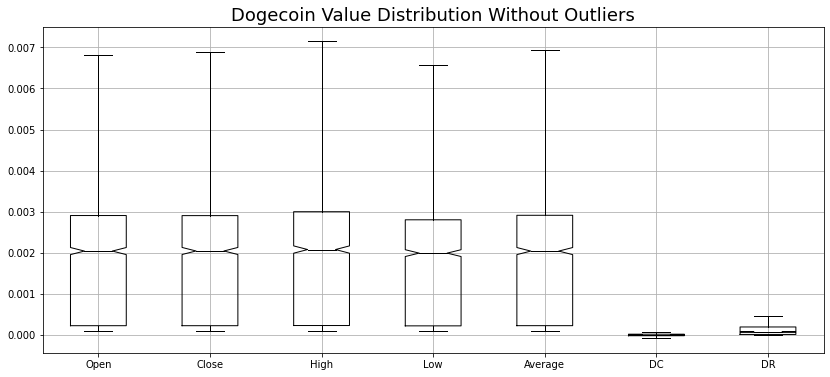

In [9]:
d2pno = d2p.boxplot(color = 'black', figsize = [14, 6], notch = True, showfliers = False)
d2pno.set_title('Dogecoin Value Distribution Without Outliers', fontsize=18)

Without the outliers, which peak around 8 cents per Dogecoin, the max range of most of the data floats around .7 cents, with an average close to .2 cents. 

### Values at Open and Close

Text(0.5, 1.0, 'Dogecoin Open vs Close')

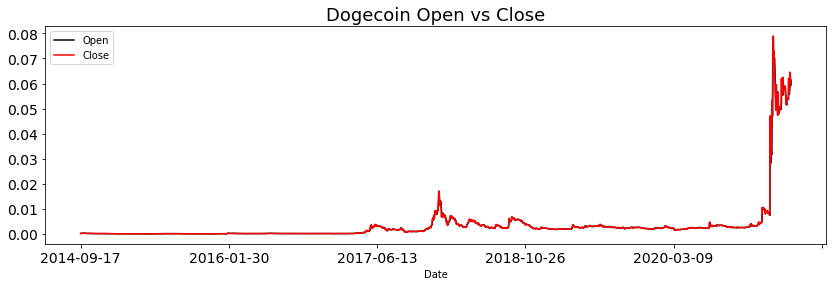

In [10]:
dogeoc = doge[['Open', 'Close']]
dogeoc = dogeoc.plot(kind='line',color = ('black', 'red'), figsize = [14, 4], fontsize = 14)
dogeoc.set_title('Dogecoin Open vs Close', fontsize = 18)

As should be expected, there is essentially no perceptable difference between opening and closing values; the closing value on a Monday is the opening value on a Tuesday. If there were discrepancies, this would probably mean there is an issue within the data.

Now, let's use the added Day Change column to let the computer do the work for us, to see where the real changes are.

Text(0.5, 1.0, 'Daily Change in Dogecoin Values')

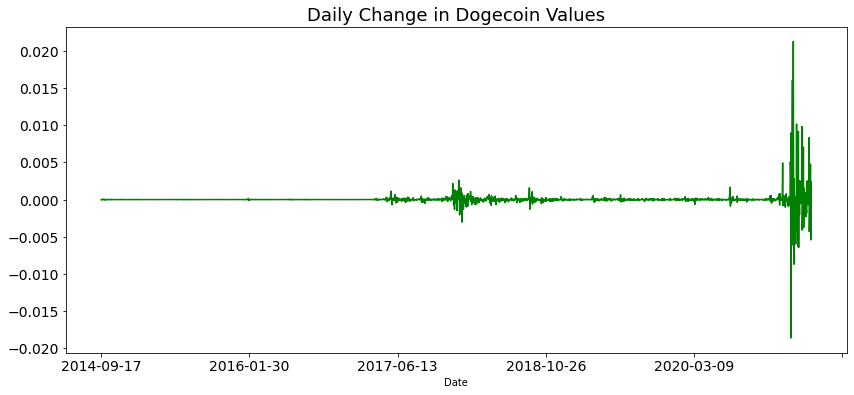

In [11]:
d2dc = doge2.DC.plot(kind = 'line', color = 'green', figsize = [14, 6], fontsize = 14)
d2dc.set_title('Daily Change in Dogecoin Values', fontsize = 18)

Although when the actual values are compared side by side, there is no really perceptable change, when we look at the Day Change alone, there is a surprising amount of volatility around the start of 2018, and a pretty extreme amount from late 2020 onwards.

.02 as both a high and low equates to 2 cents, which is probably less than the amount of electricity it has taken to run these programs to this point. However, if a Dogecoin costed even 10 cents, that's a 20% fluctuation - if the stocks in my 401k had a daily change like that, I'd probably have nothing but gray hair.

### Day Ranges

Let's take a look at highs and lows to see if there are any "whoa, what's happening there?" moments for specific days (sharp peaks and / or troughs in relation to one another).

Text(0.5, 1.0, 'Dogecoin High vs Low')

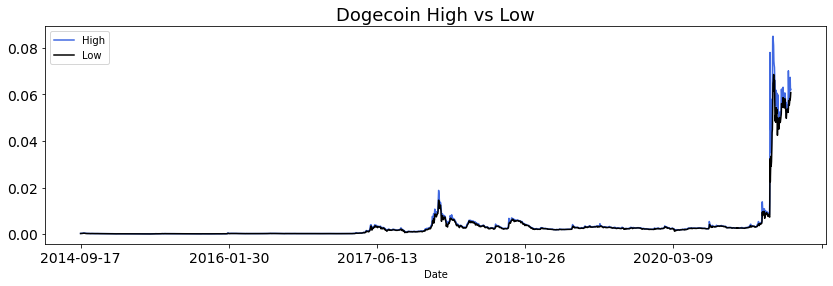

In [12]:
dogehl = doge[['High', 'Low']]
dogehl = dogehl.plot(kind='line',color = ('royalblue', 'black'), figsize = [14, 4], fontsize = 14)
dogehl.set_title('Dogecoin High vs Low', fontsize = 18)

The range is much more perceptable here than with the daily change. However, to really emphasize the changes, let's look at that added value from earlier.

Text(0.5, 1.0, 'Daily Range of Dogecoin')

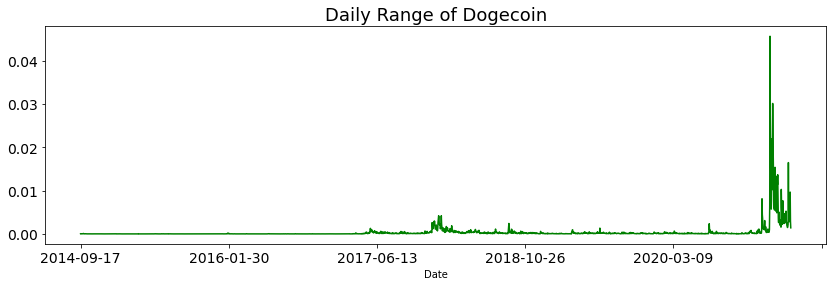

In [13]:
d2dr = doge2.DR.plot(kind = 'line', color = 'green', figsize = [14, 4], fontsize = 14)
d2dr.set_title('Daily Range of Dogecoin', fontsize = 18)

### Transaction Amount and Worth

Text(0.5, 1.0, 'Daily Volume of Dogecoin Transactions (in 10s of Billions)')

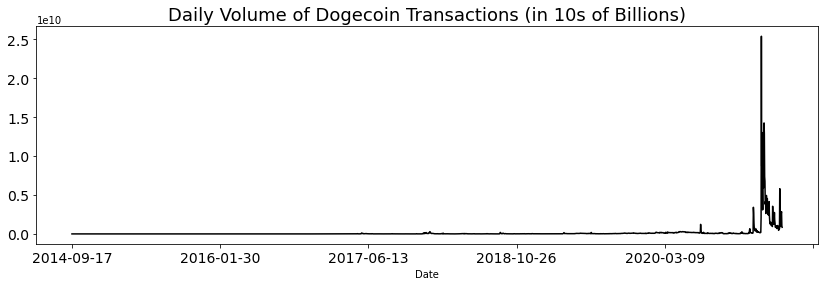

In [14]:
d2v = doge2.Volume.plot(kind = 'line', color = 'black', figsize = [14, 4], fontsize = 14)
d2v.set_title('Daily Volume of Dogecoin Transactions (in 10s of Billions)', fontsize = 18)

Text(0.5, 1.0, 'Daily Impact of Dogecoin Transactions, in Billions')

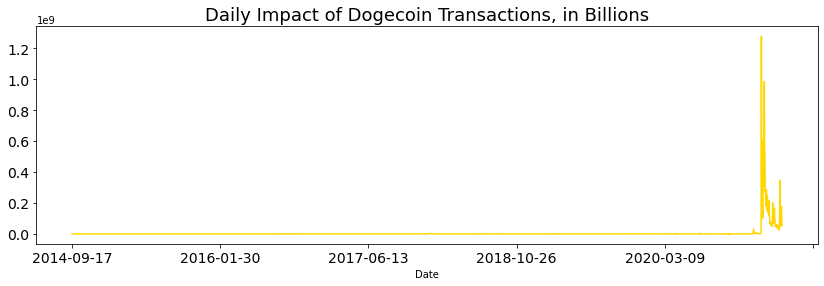

In [15]:
d2i = doge2.Impact.plot(kind = 'line', color = 'gold', figsize = [14, 4], fontsize = 14)
d2i.set_title('Daily Impact of Dogecoin Transactions, in Billions', fontsize = 18)

In spite of Dogecoin not even reaching 25 cents in value at peak (enough for one round of Street Fighter, in an arcade, in 1998), it has still managed to see over 25 billion transactions in a single day, for a total value of money being exchanged at over 1.2 billion dollars. 

Though no where near the worth of Bitcoin or the blue chips, this data has definantly given me a deeper appreciation for Dogecoin, and I hope this notebook has either given you a deeper appreciation for this cryptocurrency, or, at the least, has entertained you.

### Dates of Record

Now that we've seen the course of Dogecoin values, let's delve into the days that set record prices, in order to try and understand what may lead to the popularity and volatility of Dogecoin.

In [16]:
print("Highest Daily Close:", doge2.Close.max())
print("Highest Daily Price:", doge2.High.max())
print("Highest Daily Average:", doge2.Average.max())
print("Highest Daily Volume Traded:", doge2.Volume.max())
print("Highest Daily Sum of Transactions:", doge2.Impact.max())

Highest Daily Close: 0.078825
Highest Daily Price: 0.084945
Highest Daily Average: 0.076706
Highest Daily Volume Traded: 25403310432.0
Highest Daily Sum of Transactions: 1277850023.00568


In [17]:
print('3 Highest Closing Days:', doge2.Close.sort_values(ascending = False).head(3))
print('----------')
print('3 Days with Highest Price:', doge2.High.sort_values(ascending = False).head(3))
print('----------')
print('3 Highest Average Days:', doge2.Average.sort_values(ascending = False).head(3))
print('----------')
print('3 Days with Highest Volume:', doge2.Volume.sort_values(ascending = False).head(3))
print('----------')
print('3 Highest Value of Dogecoin Traded Days:', doge2.Impact.sort_values(ascending = False).head(3))

3 Highest Closing Days: Date
2021-02-08    0.078825
2021-02-07    0.078782
2021-02-10    0.072896
Name: Close, dtype: float64
----------
3 Days with Highest Price: Date
2021-02-08    0.084945
2021-02-07    0.084357
2021-02-09    0.083128
Name: High, dtype: float64
----------
3 Highest Average Days: Date
2021-02-08    0.076706
2021-02-09    0.074398
2021-02-10    0.073156
Name: Average, dtype: float64
----------
3 Days with Highest Volume: Date
2021-01-29    2.540331e+10
2021-02-07    1.426102e+10
2021-02-04    1.304084e+10
Name: Volume, dtype: float64
----------
3 Highest Value of Dogecoin Traded Days: Date
2021-01-29    1.277850e+09
2021-02-08    9.852406e+08
2021-02-07    9.800176e+08
Name: Impact, dtype: float64


In [18]:
print('1 Highest Value Dogecoin =', doge2.High.max()/doge2.Open[0], 'Dogecoins at First Open')

1 Highest Value Dogecoin = 289.9146757679181 Dogecoins at First Open


As of April 8th, 2021, the date which has seen the highest overall value of Dogecoin is February 8th, 2021, with the range of February 7th to February 10th being represented as second and third place among the Close, High, Average, Volume, and Impact values. 

Interestingly, January 29th, 2021, saw the most trades occur and represented the highest value of transactions in Dogecoin history, even though the price per unit was not at it's peak.

#### February 8th, 2021 - Why?

Why was February 8th, 2021, the day that Dogecoin peaked at nearly 290 times its first opening value, the day that it peaked? What else was going on that day that could have influenced Dogecoin's spike?

Could these tweets have anything to do with them?

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">🎶 Who let the Doge out 🎶</p>&mdash; Elon Musk (@elonmusk) <a href="https://twitter.com/elonmusk/status/1358542364948668418?ref_src=twsrc%5Etfw">February 7, 2021</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
<blockquote class="twitter-tweet"><p lang="vi" dir="ltr">Ð is for Ðogecoin! Instructional video.<a href="https://t.co/UEEocOfcTb">https://t.co/UEEocOfcTb</a></p>&mdash; Elon Musk (@elonmusk) <a href="https://twitter.com/elonmusk/status/1358584801003884544?ref_src=twsrc%5Etfw">February 8, 2021</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

Or could this crypto-related story have helped drive it along?

#### Tesla buys $1.5 billion in bitcoin, plans to accept it as payment
PUBLISHED MON, FEB 8 20217:48 AM EST

https://www.cnbc.com/2021/02/08/tesla-buys-1point5-billion-in-bitcoin.html

### Additional Questions / Research

The trend of Dogecoin could be better understood with a few additional data sets, to allow comparison and context. Some useful data would be:

* The price trend of Bitcoin, to compare the most popular cryptocurrency with Dogecoin. Is Dogecoin an inferior good, that only those who can't afford to buy into Bitcoin opt for, or has the boom in price of Bitcoin led speculators to assume Dogecoin will grow in a similar way?

* The price trend of the Stock Market, which is the most widely invested in and accepted investment tool in the US. Especially if ROI rates could be considered between crypto-investments and Wall Street Investments, and compared with some of the other events happening around that time (Gamestop, anyone??)

* The yield of the 10 Year T Note. This is a staple of ensured investment and, honestly, if the US Gov't defaults on a bond, there's a good chance losing a few thousand dollars is going to be the least of your worries, assuming you are from the US. With rates finally climbing up following this trend, and the supply of cheap loans starting to contract, this may have led to a decline in Dogecoin attractiveness. It has been argued, however, that cheap money makes for risky investments, since stable investments aren't paying much at all. 

* How has Dogecoin faired since NFTs (Non-Fungible Tokens) have risen in popularity? Have NFTs pulled any of the crypto investors away, and, if so, by how much?

### Conclusion

Dogecoin seems to have peaked with a lot of the buzz the Elon Musk gave it; that being said, Musk's comments were made after the peak trading day, meaning that, although he seemed to have help it peak, he merely saw a trend and commented on it, further building upon the hype.

How has Dogecoin actually faired? The value that it held in early 2021 has begun to come down; there could be an additional peak or growth in the future, as there have been in the past (but, if it was truly predictable, I would probably be investing at the lows, waiting to sell off at the next peak, and not giving out any analysis freely, at the least).

## THANK YOU!

I hope this notebook has been enjoyable, and either given you context, info, or a chuckle about, arguably, the cutest of cryptocurrencies. I love feedback - please let me know what you think was good, and what needs work!